In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
tick = pd.read_csv("test_tick_happy_path.csv")
tick["date-time"] = pd.to_datetime(tick["date-time"])
tick.set_index("date-time", inplace=True)

## Plot Tick

<Axes: xlabel='date-time'>

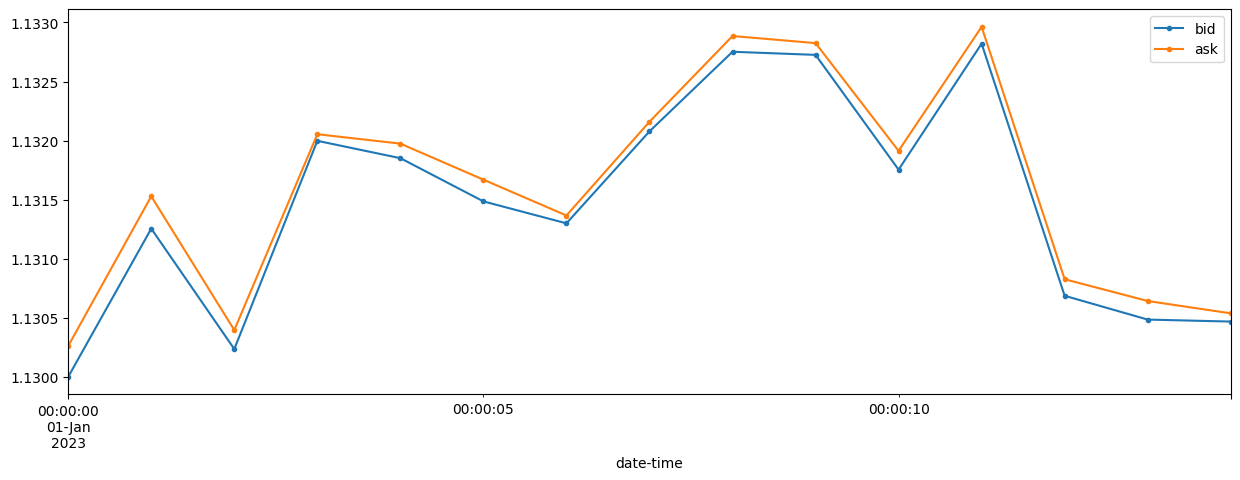

In [3]:
tick[["bid","ask"]][0:15].plot(marker=".", figsize=(15,5))

## Plot Spread Distribution

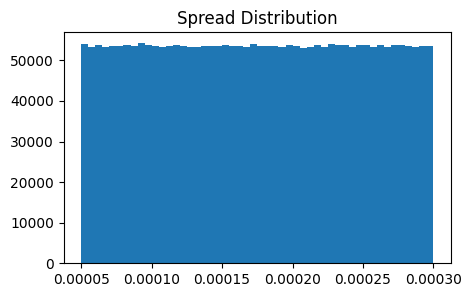

In [4]:
fig, ax = plt.subplots(1, figsize=(5,3))
tick["spread"].hist(bins=50, ax = ax)
ax.grid(False)
ax.set_title("Spread Distribution")
plt.show()

## Plot Return Deistribution

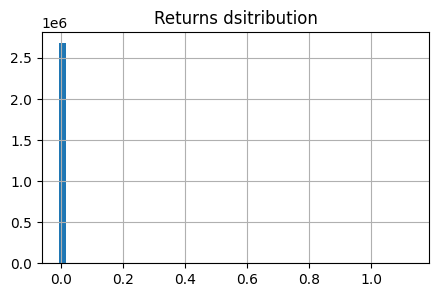

In [5]:
fig, ax = plt.subplots(1, figsize=(5,3))
ax.grid(False)
tick["delta_p"].hist(bins=50, ax=ax)
ax.set_title("Returns dsitribution")
plt.show()

In [6]:
tick.describe()

,delta_p,bid,spread,ask
count,2.678401e+06,2.678401e+06,2.678401e+06,2.678401e+06
mean,1.388525e-06,2.086916e+00,1.749798e-04,2.087091e+00
std,1.215034e-03,6.770629e-01,7.218186e-05,6.770629e-01
min,-5.051274e-03,8.182793e-01,5.000006e-05,8.184802e-01
25%,-6.731084e-04,1.596766e+00,1.124488e-04,1.596944e+00
50%,9.938260e-07,1.885581e+00,1.749714e-04,1.885753e+00
75%,6.759189e-04,2.604445e+00,2.374974e-04,2.604617e+00
max,1.130000e+00,3.816079e+00,3.000000e-04,3.816205e+00


In [7]:
tick.tail()

,delta_p,bid,spread,ask
date-time,,,,
2023-01-31 23:59:56,-0.000664,3.718442,0.000284,3.718726
2023-01-31 23:59:57,0.000463,3.718905,0.000244,3.719148
2023-01-31 23:59:58,0.000175,3.719079,0.000266,3.719346
2023-01-31 23:59:59,-0.002116,3.716963,0.000240,3.717203
2023-02-01 00:00:00,0.002064,3.719027,0.000288,3.719315


In [8]:
ohlc = tick["bid"].resample("1h").ohlc()

## Plot OHLC

In [9]:
ohlc = pd.read_csv("ohlc_bid_1h.csv")
ohlc["date-time"] = pd.to_datetime(ohlc["date-time"])
ohlc.set_index("date-time", inplace=True)

In [10]:
ohlc.head()

,open,high,low,close
date-time,,,,
2023-01-01 00:00:00,1.300000,1.336632,1.257863,1.302041
2023-01-01 01:00:00,1.301170,1.374050,1.263919,1.265996
2023-01-01 02:00:00,1.267390,1.292077,1.217640,1.231469
2023-01-01 03:00:00,1.232960,1.280205,1.190603,1.236887
2023-01-01 04:00:00,1.235656,1.303587,1.224607,1.255887


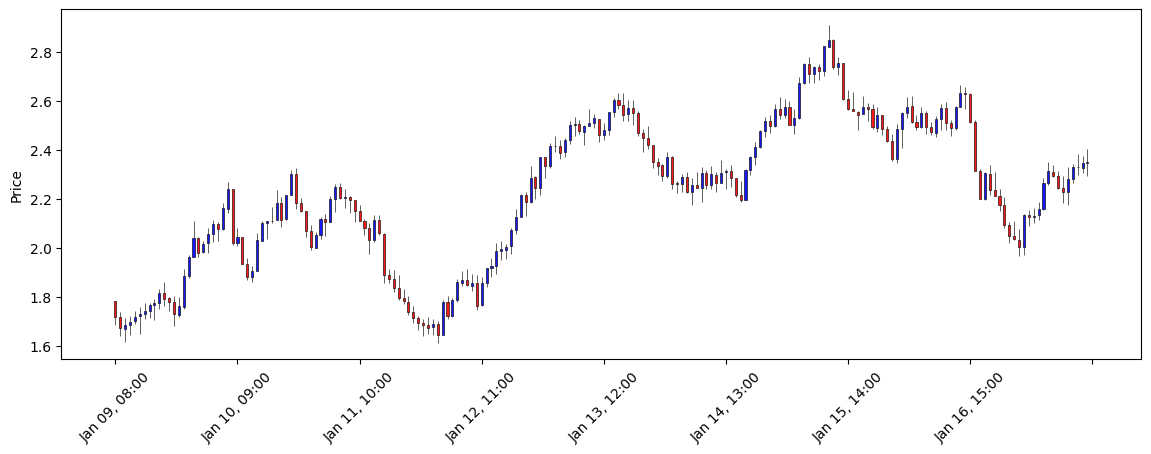

In [11]:
mc2 = mpf.make_marketcolors(up='blue',down='r')
s2  = mpf.make_mpf_style(marketcolors=mc2)
mpf.plot(ohlc[200:400], type="candle", figsize=(15,5), style=s2)

In [12]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.

